<a href="https://colab.research.google.com/github/sahilkhan-7/deep-learning/blob/main/Perceptron_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Peceptron from Scratch**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def predict(X, weights):
    '''
    Function to predict labels
    '''
    z = np.dot(X, weights)
    return sigmoid(z)

In [ ]:
def loss(X, y, weights):
    '''
    Function to calculate the loss
    '''
    m = X.shape[0]
    y_pred = predict(X, weights)
    return -1/m * (np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

In [ ]:
def update_weights(X, y, weights, learning_rate):
    '''
    Function to update the weights
    '''
    m = X.shape[0]

    y_pred = predict(X, weights)
    gradient = np.dot(X.T, y_pred - y)/m
    weights -= learning_rate * gradient

    return weights


In [ ]:
def train(X, y, learning_rate, epochs = 100):
    '''
    Function to train the model
    '''
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((X, bias))
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        weights = update_weights(X, y, weights, learning_rate)
        cost = loss(X, y, weights)
        if epoch % 10 == 0:
            cost = loss(X, y, weights)
            print(f"Epoch: {epoch}, Cost: {cost}")
    return weights

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=42)

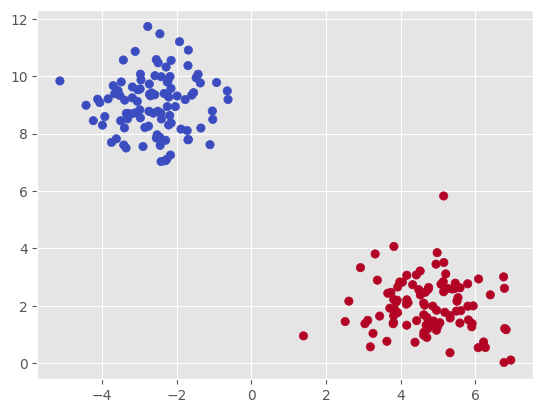

In [ ]:
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

In [ ]:
def get_prediction(X_test, weights, lables = True):
    '''
    Function to get the predictions
    '''
    if X_test.shape[1] != weights.shape[0]:
        bias = np.ones((X_test.shape[0], 1))
        X_test = np.hstack((X_test, bias))

    y_pred = predict(X_test, weights)

    if not lables:
        return y_pred

    y_pred = np.where(y_pred > 0.5, 1, 0)
    return y_pred

In [ ]:
weights = train(X, y, 0.01, 200)

Epoch: 0, Cost: 0.6311218168825207
Epoch: 10, Cost: 0.34200585107001785
Epoch: 20, Cost: 0.23755106210118815
Epoch: 30, Cost: 0.181694956740585
Epoch: 40, Cost: 0.14693902604827502
Epoch: 50, Cost: 0.12332333403465551
Epoch: 60, Cost: 0.10628175826793673
Epoch: 70, Cost: 0.09342762921749148
Epoch: 80, Cost: 0.08339686379922519
Epoch: 90, Cost: 0.07535596693198493
Epoch: 100, Cost: 0.06876823092038324
Epoch: 110, Cost: 0.06327307976630561
Epoch: 120, Cost: 0.058619620592270105
Epoch: 130, Cost: 0.05462805443351413
Epoch: 140, Cost: 0.05116625076819499
Epoch: 150, Cost: 0.04813498184592128
Epoch: 160, Cost: 0.04545830916038536
Epoch: 170, Cost: 0.0430771454779295
Epoch: 180, Cost: 0.04094483547040374
Epoch: 190, Cost: 0.039024054862280985


[-3.         -1.55555556 -0.11111111  1.33333333  2.77777778  4.22222222
  5.66666667  7.11111111  8.55555556 10.        ] [-8.68626056e+00 -4.35499657e+00 -2.37325938e-02  4.30753139e+00
  8.63879537e+00  1.29700593e+01  1.73013233e+01  2.16325873e+01
  2.59638513e+01  3.02951153e+01]


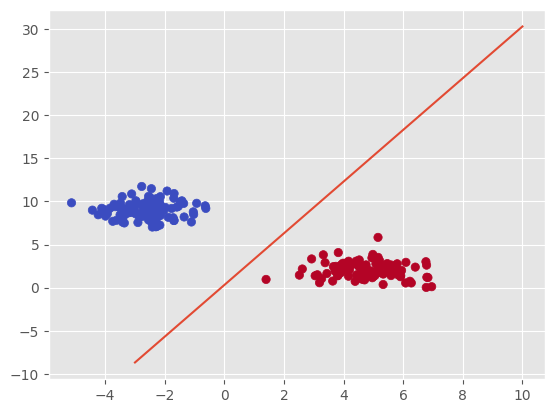

In [ ]:
x1 = np.linspace(-3, 10, 10)
x2 = -(weights[0] * x1 + weights[2])/weights[1]
print(x1, x2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.plot(x1, x2)

# **Multi-Layer Peceptron OR ANN**

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)

# Defining the inputs
input = np.array([[0.5, 0.3, 0.2],
                   [0.9, 0.4, 0.7],
                   [0.3, 0.9, 0.5]])

# Define the expected output
expected_output = np.array([[1], [0], [1]])

# Defining the neurons, we are having 1 hidden layer with 4 neurons
input_layer_neurons = input.shape[1]
hidden_layer_neurons = 4
output_neurons = 1

hidden_weights = np.random.rand(input_layer_neurons, hidden_layer_neurons)
hidden_bias = np.random.rand(1, hidden_layer_neurons)
output_weights = np.random.rand(hidden_layer_neurons, output_neurons)
output_bias = np.random.rand(1, output_neurons)

# print(input_layer_neurons)
# print(hidden_layer_neurons)
# print(output_neurons)

# print("Hidden layer weights:\n", hidden_weights)
# print("Hidden layer bias: \n", hidden_bias)
# print("Output layer weights : \n", output_weights)
# print("Output bias : ", output_bias)


# Defining the learning rate
lr = 0.3

epochs = 10000

for epoch in range(epochs):
    hidden_activation = np.dot(input, hidden_weights) + hidden_bias
    hidden_output = sigmoid(hidden_activation)

    output_activation = np.dot(hidden_output, output_weights) + output_bias
    predicted_output = sigmoid(output_activation)

    error = expected_output - predicted_output

    # Backpropogation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(output_weights.T)

    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)


    # Updating Weights and Biases
    output_weights += hidden_output.T.dot(d_predicted_output) * lr
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
    hidden_weights += input.T.dot(d_hidden_layer) * lr
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

# print("Output layer weights : \n", output_weights)
# print("Output bias : ", output_bias)

print("Final output after training : ", predicted_output)

Final output after training :  [[0.98148524]
 [0.01860347]
 [0.99418751]]
